<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_03_amazon_reviews_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import time
import warnings

time.sleep(12)
warnings.filterwarnings('ignore')

In [127]:
## Define URLs for Scraping Amazon Reviews
urls = [
    'https://www.amazon.co.uk/dp/B0C2PRHCD3',
    'https://www.amazon.co.uk/dp/B0CYZH3D7Y',
    'https://www.amazon.co.uk/dp/B0D2D66R82',
    'https://www.amazon.co.uk/dp/B0DP1YVFQL',
    'https://www.amazon.co.uk/dp/B0DK1KK1FM'
]

In [128]:
reviews_list = []
ratings_list = []

# Iterate over each movie URL
for url in urls:
    print(f"Scraping: {url}")
    headers = {'User-Agent': 'Mozilla/5.0'}  # Prevent getting blocked
    page = requests.get(url, headers=headers)

    print(f"page: {page}\n")
    # print(f"page.content,: {page.content}\n")

    # Parse the page content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find all review containers
    review_containers = soup.find_all('li', class_='review aok-relative')
    # print(f"review_containers: {review_containers}\n")

    # Extract review text and rating
    for container in review_containers:
        # Extract rating
        rating_element = container.find('span', class_='a-icon-alt')
        print(f"rating_element: {rating_element}\n")

        rating = int(float(rating_element.get_text(strip=True).split()[0])) if rating_element else 0
        print(f"rating: {rating}\n")

        # Extract review text
        review_element = container.find('div', class_='a-expander-content reviewText review-text-content a-expander-partial-collapse-content')
        # print(f"review_element: {review_element}\n")

        review_text = review_element.get_text(strip=True) if review_element else "No Review"
        # print(f"review_text: {review_text}\n")

        # Append to lists
        reviews_list.append(review_text)
        ratings_list.append(rating)

        # print(f"Review: {review_text[:100]}...")  # Print preview
        # print(f"Rating: {rating}\n")

    # Sleep to prevent being blocked
    time.sleep(20)

ratings_list

Scraping: https://www.amazon.co.uk/dp/B0C2PRHCD3
page: <Response [200]>

Scraping: https://www.amazon.co.uk/dp/B0CYZH3D7Y
page: <Response [200]>

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">4.0 out of 5 stars</span>

rating: 4

Scraping: https://www.amazon.co.uk/dp/B0D2D66R82
page: <Response [200]>

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

Scraping: https://www.amazon.co.uk/dp/B0DP1YVFQL
page: <Response [500]>

Scraping: https://www.amazon.co.uk/dp/B0DK1KK1FM
page: <Response [200]>



[5, 5, 4, 5, 5, 5]

In [129]:
# print(reviews_list[1], "   ", ratings_list[1])
ratings_list

[5, 5, 4, 5, 5, 5]

In [130]:
amazon_df = pd.DataFrame({'Review': reviews_list, 'Rating': ratings_list})

# Save to CSV
amazon_df.to_csv('amazon_reviews_dataset.csv', index=False)

# Display first few rows
print(amazon_df.head())
print(amazon_df.info())

                                              Review  Rating
0  The media could not be loaded.After a week of ...       5
1  The S1 is an amazing vacuum and mop. Setup is ...       5
2  The media could not be loaded.We recently upgr...       4
3  I’ve been thoroughly impressed with the Roboro...       5
4  Having spent several h̶o̶u̶r̶s̶ days researchi...       5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  6 non-null      object
 1   Rating  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None


In [131]:
comments=["This is a good film","Interesting film","I do not like film", "Such a wonderful movie","very interesting film",
         "This film is about love story","Do not watch this film","I love this film", "I do not know, I feel it is an interesting film",
         "I like to watch film again", "This film is awesome", "I recommend watching this film to everyone, enjoy it"]


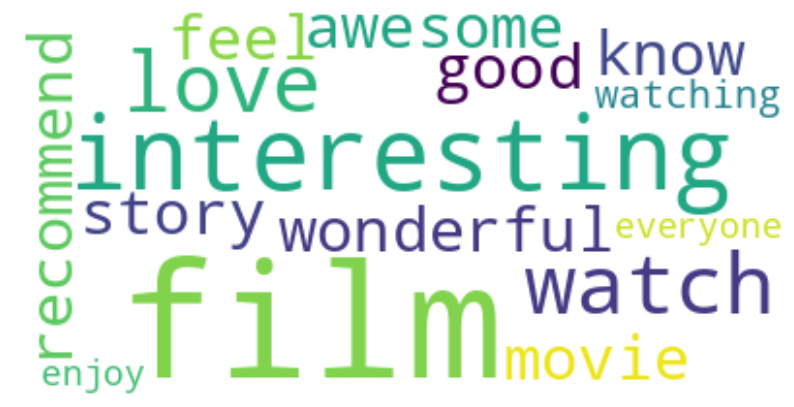

In [132]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

text = ', '.join(t for t in comments)
#print(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

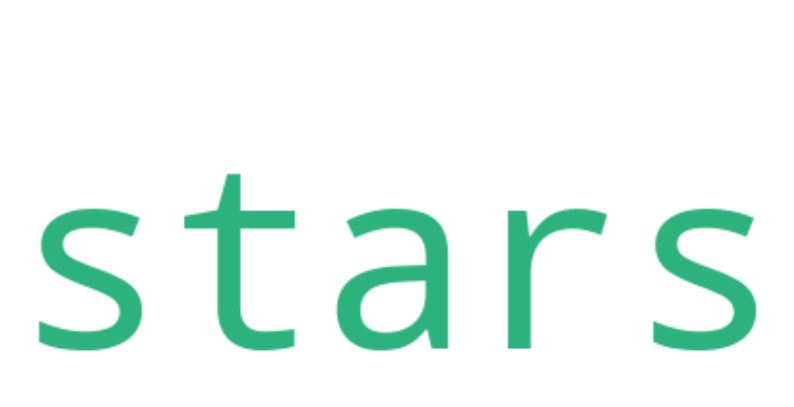

In [133]:
### WordCloud Visualization



text = ', '.join(t for t in movie['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [135]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores("It tries to engage the people who are watching it. It tries to suprise people, however, this film is not interesting")
#sentiment_dict = sid_obj.polarity_scores("I love this film. It is wonderful!")
#sentiment_dict = sid_obj.polarity_scores("I am not sure about this film, no idea!")
print("Overall sentiment dictionary is : ", sentiment_dict)
print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

print("Sentence Overall Rated As", end=" ")

    # Decide sentiment as positive, negative, or neutral
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")
elif sentiment_dict['compound'] <= -0.05 :
    print("Negative")
else :
    print("Neutral")

Overall sentiment dictionary is :  {'neg': 0.095, 'neu': 0.803, 'pos': 0.101, 'compound': 0.0366}
Sentence was rated as  9.5 % Negative
Sentence was rated as  80.30000000000001 % Neutral
Sentence was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Neutral


In [136]:
#use this when you have an offline dataset
#movie =  pd.read_csv("F:\A-universities\WLV\workshop\Workshop3_IMDB_Dataset.csv")
#print(movie.head())
#print(movie.info())

In [137]:
# Convert Rating to string first, then replace non-numeric values safely
movie['Rating'] = pd.to_numeric(movie['Rating'], errors='coerce')
#NaN represents missing or undefined data
# Fill NaN values with a default value (e.g., 0) before converting to integer
movie['Rating'] = movie['Rating'].fillna(0).astype(int)

### Extract Reviews and Ratings
## Text Processing and Analysis
### Importing Required Libraries




In [138]:
# content = []
# for url in urls:
#     page = requests.get(url, timeout=2.50)
#     soup = BeautifulSoup(page.content, 'html.parser')
#     content.append(soup.find_all('div', class_='review-container'))

# Initialize lists to store extracted reviews and ratings
# Create DataFrame

import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie['Review']:
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning

movie['class-label'] = movie['Rating'].astype(int).apply(lambda x: '1' if x > 5 else ('-1' if x < 5 else '0'))
movie = movie[movie['class-label'] != '0']

#movie.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie['Review'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie['class-label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



Matrix dimension: (3, 1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [139]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
## Train and Evaluate Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format
#use this when you have an offline dataset
# movie1 =  pd.read_csv("F:\A-universities\WLV\workshop\Week 3\IMDB\Valid.csv")

if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/Valid.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/Valid.csv'  # Local path

movie1 = pd.read_csv(file_path)

print(movie1.head())
print(movie.info())

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

text = ', '.join(t for t in movie1['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie1['text']:
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie1['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning


# movie1.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie1['text'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie1['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
#disp.plot(cmap='Blues', values_format='d')
#plt.title("Confusion Matrix")
#plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

In [ ]:

movie1['class-label'] = movie1['Sentiment'].apply(lambda x: 1 if x == "positive" else  0)
count=0
for i in range(0,len(set_2)-1):
    if set_1[i]==set_2[i]:
        count=count+1
print(count/len(set_2))